<b>To proove correlation between NIFTY Bank indices and US Core PCE</b>

Null Hypothesis:  

    There is no significant correlation between US Core PCE and the Indian Financial sectors
        
    
Alternative Hypothesis:  
    
    There is a significant correlation between US Core PCE and the Indian Financial Sector returns (Interpretation: The changes in US Core PCE have a statistically significant linear relationship with the changes in the Indian Financial Sector returns.)  
    
                                                                                                    

We will be analysing the NIFTY Bank indices as a proxy for Indian Financial sectors since we have larger data available for it.
First we will get data and merge the two of the dataframes(one for US core PCE and other for the NIFTY Bank indices).
    We will be having less data for US core PCE since it is updated monthly and not on a daily basis.
    But data would be more than enough to validate our hypothesis.

<b>STEP 1:</b>  
    
        Collecting and preprocessing the data

In [12]:
import pandas as pd

nifty_bank_df = pd.read_csv("^NSEBANK.csv")
core_pce_df = pd.read_csv("uscore_pce_preceding.csv")


# Convert date columns to datetime format
nifty_bank_df['Date'] = pd.to_datetime(nifty_bank_df['Date'])
core_pce_df['DATE'] = pd.to_datetime(core_pce_df['DATE'])

# Align dates and filter data to common period
nifty_bank_df = nifty_bank_df.set_index('Date').sort_index()
core_pce_df = core_pce_df.set_index('DATE').sort_index()

# Align dataframes to the overlapping date range
common_dates = nifty_bank_df.index.intersection(core_pce_df.index)
nifty_bank_df = nifty_bank_df.loc[common_dates]
core_pce_df = core_pce_df.loc[common_dates]

# Calculate monthly returns for the Nifty Bank Index
nifty_bank_df['Monthly_Return'] = nifty_bank_df['Adj Close'].pct_change() * 100

# Drop the first row with NaN values in returns
nifty_bank_df = nifty_bank_df.dropna(subset=['Monthly_Return'])

# Merge the dataframes on dates
merged_df = pd.merge(nifty_bank_df[['Monthly_Return']], core_pce_df, left_index=True, right_index=True)

# Display the first few rows of the merged dataframe
merged_df.head()


,Monthly_Return,DPCCRAM1M225NBEA
2007-11-01,15.162441,0.1
2008-01-01,7.682145,0.1
2008-02-01,-5.837309,-0.3
2008-04-01,-29.151228,0.4
2008-07-01,-28.378055,-0.3


Now we are done with making our data, now we have to perform statistical analysis to get pearson correlation coefficient and perform our hypothesis test.

Note that while performing our hypothesis test we have considered our level of significance ($\alpha$ = 0.05)

<b>STEP2:</b>

    Visualising the Data

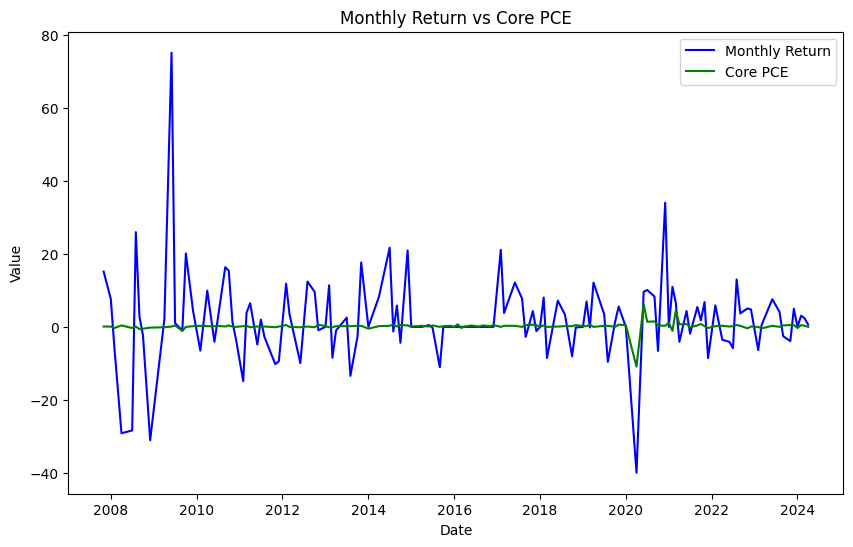

In [21]:
import matplotlib.pyplot as plt

# Plotting the two columns
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(merged_df.index, merged_df['Monthly_Return'], label='Monthly Return', color='blue')
plt.plot(merged_df.index, merged_df['DPCCRAM1M225NBEA'], label='Core PCE', color='green')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Monthly Return vs Core PCE')
plt.legend()

# Displaying the plot
plt.show()


<b>STEP 3:</b>

    Statistical Analysis

In [13]:
from scipy.stats import pearsonr

# Extract the relevant columns
nifty_returns = merged_df['Monthly_Return']
core_pce_changes = merged_df['DPCCRAM1M225NBEA']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(nifty_returns, core_pce_changes)

correlation_coefficient, p_value


(0.30697101593101106, 0.0004475497058707593)

<b>p-value comes out to be 0.0004475497058707593 which is much less than our significance level.</b>  
    
    Now since we have our correlation coefficient, we move forward to calculate our t_statistic using correlaton coefficient.

In [14]:
from scipy.stats import t

# Pearson correlation coefficient (r)
# Number of observations (n)
n = len(merged_df)  # replace nifty_returns with your actual data

# Calculate the t-statistic
t_statistic = correlation_coefficient * ((n - 2) ** 0.5) / ((1 - correlation_coefficient ** 2) ** 0.5)

# Degrees of freedom
df = n - 2

# Calculate the p-value from the t-distribution
p_value_ttest = 2 * (1 - t.cdf(abs(t_statistic), df))

print(f"t-statistic: {t_statistic}, p-value: {p_value_ttest}")


t-statistic: 3.606149278842576, p-value: 0.00044754970587068676


<b>Pearson Correlation Coefficient = 0.307</b>

<b>p-value = 0.000448</b>

<b>t-statistic = 3.60615</b>

Null Hypothesis (H0):  

    There is no significant correlation between US Core PCE and the Indian Financial Sector returns.
<b>Rejected based on our analysis.</b>


Alternative Hypothesis (H1):  

    There is a significant correlation between US Core PCE and the Indian Financial Sector returns.
<b>Accepted. The correlation is statistically significant.</b>

<b>Summary</b>  

    There is a statistically significant positive correlation between the changes in US Core PCE and the returns of the Nifty Bank Index. This means that changes in US Core PCE have a significant linear relationship with the changes in the Indian financial sector returns.